# Project 9

One of my good friends Clara absolutely loves this show called Taskmaster which she got me hooked on my sophomore year. The show is hosted by two comedians, Greg Davis and Alex Horne, and the premise is that they invite 5 comedians onto the show each season and challenge them to do some ridiculous tasks. Some examples of tasks include: not blinking for the longest time, making a Swedish man blush, and getting to a microwave in time to stop it from making soup too hot by taking as few steps as possible.

On Data is Plural, I found data compiled by a Reddit user who went through the website Taskmaster.info and created a number of datasets containing general demographic information about the contestants, as well as more specific information like how many times they cursed over the course of their respective series.

One thing the show has been criticised for is its lack of representation of female comedians, with female comedians usually making up 1, at most 2, of the five contestants. At times, it appears that Greg Davis, who orchestrates the show, seems to openly favor the male contestants, what with challenges being things like "Who can tie a tie the fastest?" or having a tendency to give more points to male contestants than female contestants. I am curious to see if this is true and if the dataset corroborates that Greg has this tendency against women.

In [2]:
import pandas as pd
import numpy as np

In [3]:
people_pathname = '/Users/nikita/Downloads/people.csv'
points_pathname = '/Users/nikita/Downloads/normalized_scores.csv'

people = pd.read_csv(people_pathname)
points = pd.read_csv(points_pathname)

In [4]:
people

,id,series,series_label,seat,name,dob,gender,hand,team,team_label,champion,TMI
0,1,NaN,NaN,NaN,Alex Horne,1978-09-10,M,R,NaN,NaN,0,32
1,2,NaN,NaN,NaN,Greg Davies,1968-05-14,M,R,NaN,NaN,0,19
2,3,1.0,Series 1,1.0,Frank Skinner,1957-01-28,M,R,1.0,Frank and Tim,0,56
3,4,1.0,Series 1,2.0,Josh Widdicombe,1983-04-08,M,R,2.0,"Josh, Roisin and Romesh",1,69
4,5,1.0,Series 1,3.0,Roisin Conaty,1979-03-26,F,R,2.0,"Josh, Roisin and Romesh",0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,-7.0,CoC III,1.0,Dara Ó Briain,1972-02-04,M,R,NaN,NaN,0,378
113,114,-7.0,CoC III,2.0,Mae Martin,1987-05-02,NB,R,NaN,NaN,0,395
114,115,-7.0,CoC III,3.0,Morgana Robinson,1982-05-07,F,R,NaN,NaN,0,243
115,116,-7.0,CoC III,4.0,Sarah Kendall,1976-08-03,F,R,NaN,NaN,0,177


First, let's see how many contestants are women versus men.

In [5]:
people['gender'].value_counts()

M     66
F     49
NB     2
Name: gender, dtype: int64

In [6]:
Now, how many winners were female versus male?

Object `male` not found.


In [ ]:
Now, how many winners were female versus male

In [7]:
people[people['gender']=='F'][people['champion']==1]

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_27644/3204973653.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  people[people['gender']=='F'][people['champion']==1]


,id,series,series_label,seat,name,dob,gender,hand,team,team_label,champion,TMI
10,11,2.0,Series 2,4.0,Katherine Ryan,1983-06-30,F,R,4.0,"Doc, Joe and Katherine",1,52
34,35,6.0,Series 6,3.0,Liza Tarbuck,1964-11-21,F,R,12.0,"Asim, Liza and Tim",1,59
39,40,7.0,Series 7,3.0,Kerry Godliman,1973-11-17,F,R,13.0,Jessica and Kerry,1,26
44,45,8.0,Series 8,3.0,Lou Sanders,1985-11-24,F,R,16.0,"Iain, Lou and Paul",1,54
66,67,11.0,Series 11,5.0,Sarah Kendall,1976-08-03,F,R,26.0,"Charlotte, Jamali and Sarah",1,177
70,71,12.0,Series 12,4.0,Morgana Robinson,1982-05-07,F,R,28.0,"Desiree, Guz and Morgana",1,243
81,82,13.0,Series 13,5.0,Sophie Duker,1990-01-26,F,R,30.0,"Bridget, Judi and Sophie",1,312


In [8]:
people[people['gender']=='M'][people['champion']==1]

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_27644/834796982.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  people[people['gender']=='M'][people['champion']==1]


,id,series,series_label,seat,name,dob,gender,hand,team,team_label,champion,TMI
3,4,1.0,Series 1,2.0,Josh Widdicombe,1983-04-08,M,R,2.0,"Josh, Roisin and Romesh",1,69
15,16,3.0,Series 3,4.0,Rob Beckett,1986-01-02,M,R,5.0,Rob and Sara,1,8
21,22,4.0,Series 4,5.0,Noel Fielding,1973-05-21,M,R,8.0,"Joe, Lolly and Noel",1,21
23,24,5.0,Series 5,2.0,Bob Mortimer,1959-05-23,M,R,10.0,"Aisling, Bob and Sally",1,42
48,49,9.0,Series 9,2.0,Ed Gamble,1986-03-11,M,R,18.0,"Ed, Katy and Rose",1,22
56,57,10.0,Series 10,5.0,Richard Herring,1967-07-12,M,R,21.0,Daisy and Richard,1,31
87,88,14.0,Series 14,1.0,Dara Ó Briain,1972-02-04,M,R,32.0,"Dara, Fern and John",1,378
104,105,16.0,Series 16,3.0,Sam Campbell,1992-09-19,M,R,36.0,"Julian, Lucy and Sam",1,456


Well, out of 15 series, 7 were won by women! Looking good, Greg!

Let's look at points instead.

In [9]:
points

,id,task,task_label,contestant,contestant_label,base,adjustment,points,rank,rigid,spread,scale,5+3,3+2,3½+2½
0,51,11,Unshackle yourself and sprint one metre,6,Romesh Ranganathan,4.0,NaN,4,2,4.0,4.0,4.00,NaN,NaN,NaN
1,52,11,Unshackle yourself and sprint one metre,7,Tim Key,2.0,NaN,2,4,2.0,2.0,2.00,NaN,NaN,NaN
2,53,12,The most meaningful item,3,Frank Skinner,4.0,NaN,4,2,4.0,4.0,4.00,NaN,NaN,NaN
3,54,12,The most meaningful item,4,Josh Widdicombe,2.0,NaN,2,4,2.0,2.0,2.00,NaN,NaN,NaN
4,55,12,The most meaningful item,5,Roisin Conaty,1.0,NaN,1,5,1.0,1.0,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1046,223,The most thought-provoking thing,34,Asim Chaudhry,1.0,NaN,1,5,1.0,1.0,1.00,NaN,NaN,NaN
996,1047,223,The most thought-provoking thing,35,Liza Tarbuck,2.0,NaN,2,4,2.0,2.0,2.00,NaN,NaN,NaN
997,1048,223,The most thought-provoking thing,36,Russell Howard,5.0,NaN,5,1,5.0,5.0,5.00,NaN,NaN,NaN
998,1049,223,The most thought-provoking thing,37,Tim Vine,4.0,NaN,4,2,4.0,4.0,4.00,NaN,NaN,NaN


I need gender to be included within this dataset in order to do my analysis.

In [10]:
points_gendered = pd.merge(points,people[['name','gender']], left_on='contestant_label',right_on='name',how='left')

In [11]:
points_gendered

,id,task,task_label,contestant,contestant_label,base,adjustment,points,rank,rigid,spread,scale,5+3,3+2,3½+2½,name,gender
0,51,11,Unshackle yourself and sprint one metre,6,Romesh Ranganathan,4.0,NaN,4,2,4.0,4.0,4.00,NaN,NaN,NaN,Romesh Ranganathan,M
1,52,11,Unshackle yourself and sprint one metre,7,Tim Key,2.0,NaN,2,4,2.0,2.0,2.00,NaN,NaN,NaN,Tim Key,M
2,53,12,The most meaningful item,3,Frank Skinner,4.0,NaN,4,2,4.0,4.0,4.00,NaN,NaN,NaN,Frank Skinner,M
3,54,12,The most meaningful item,4,Josh Widdicombe,2.0,NaN,2,4,2.0,2.0,2.00,NaN,NaN,NaN,Josh Widdicombe,M
4,54,12,The most meaningful item,4,Josh Widdicombe,2.0,NaN,2,4,2.0,2.0,2.00,NaN,NaN,NaN,Josh Widdicombe,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,1047,223,The most thought-provoking thing,35,Liza Tarbuck,2.0,NaN,2,4,2.0,2.0,2.00,NaN,NaN,NaN,Liza Tarbuck,F
1237,1047,223,The most thought-provoking thing,35,Liza Tarbuck,2.0,NaN,2,4,2.0,2.0,2.00,NaN,NaN,NaN,Liza Tarbuck,F
1238,1048,223,The most thought-provoking thing,36,Russell Howard,5.0,NaN,5,1,5.0,5.0,5.00,NaN,NaN,NaN,Russell Howard,M
1239,1049,223,The most thought-provoking thing,37,Tim Vine,4.0,NaN,4,2,4.0,4.0,4.00,NaN,NaN,NaN,Tim Vine,M


In Taskmaster, the aim is to win the most points, so a score of 5 points means a ranking of 1. Let's come up with some visualizations that show how points were assigned based on gender.

In [12]:
from matplotlib import pyplot as plot

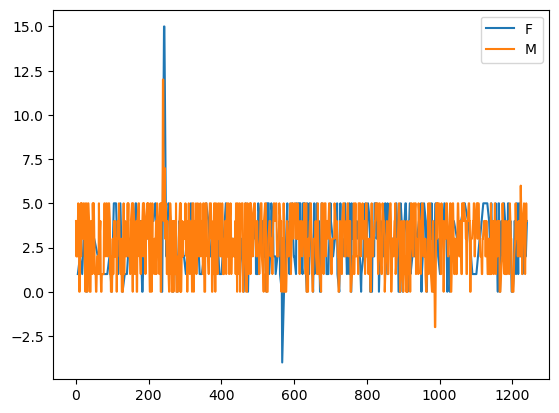

In [13]:
points_gendered.groupby('gender')['points'].plot()
plot.legend()

Well, that's illegible. Let's try a different kind of plot.

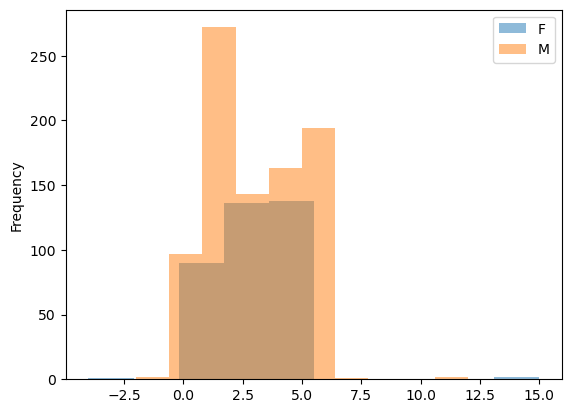

In [14]:
points_gendered.groupby('gender')['points'].plot(kind='hist',alpha = 0.5)
plot.legend()

The inclusion of special cases where points above 5 and below 0 were awarded is confusing, let's get rid of those.

In [15]:
points_gendered = points_gendered[(points_gendered['points']<=5)]
points_gendered = points_gendered[(points_gendered['points']>=0)]

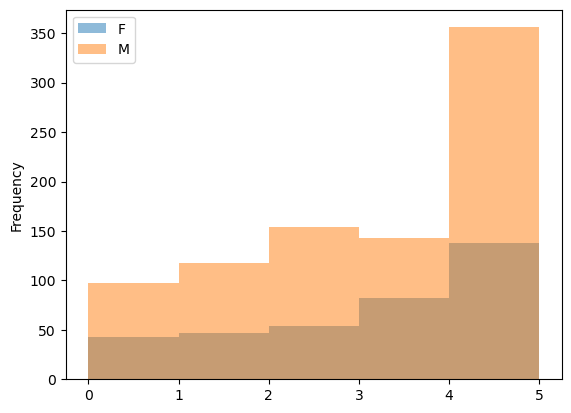

In [16]:
points_gendered.groupby('gender')['points'].plot.hist(alpha = 0.5,bins=5)
plot.legend()

Yeesh. It looks like men are more than twice as likely to be awarded with full points than women. Is this just because there have been about 17 more male contestants than female?

Let's look at what percentage of points awarded to men are 5 point scores versus women.

In [17]:
men = points_gendered[points_gendered['gender']=='M']
len(men)

868

In [18]:
len(men[men['points']==5])/len(men)

0.22235023041474655

In [19]:
women = points_gendered[points_gendered['gender']=='F']
len(women)

364

In [20]:
len(women[women['points']==5])/len(women)

0.19230769230769232

A difference of 3 percent doesn't seem significant. Let's check.

I took Stats with Apps last semester, let's see if I can remember how to calculate a p-value. First I need my points dataframe with the gender included.

In [26]:
points_gendered.to_csv('points_gendered.csv')

Now I can work in RStudio.

First, I came up with null and alternative hypotheses. My null hypothesis is that the proportion of 5 point scores awarded to men is the same as women.

H0: p_men - p_women = 0
HA: p_men - p_women ≠ 0

My alternative hypothesis is that those proportions are not the same.

Then, I created a null distribution using my dataset that simulated 5000 trials of awarding points to contestants and measuring the difference in proportion of 5 point scores awarded to men and women.

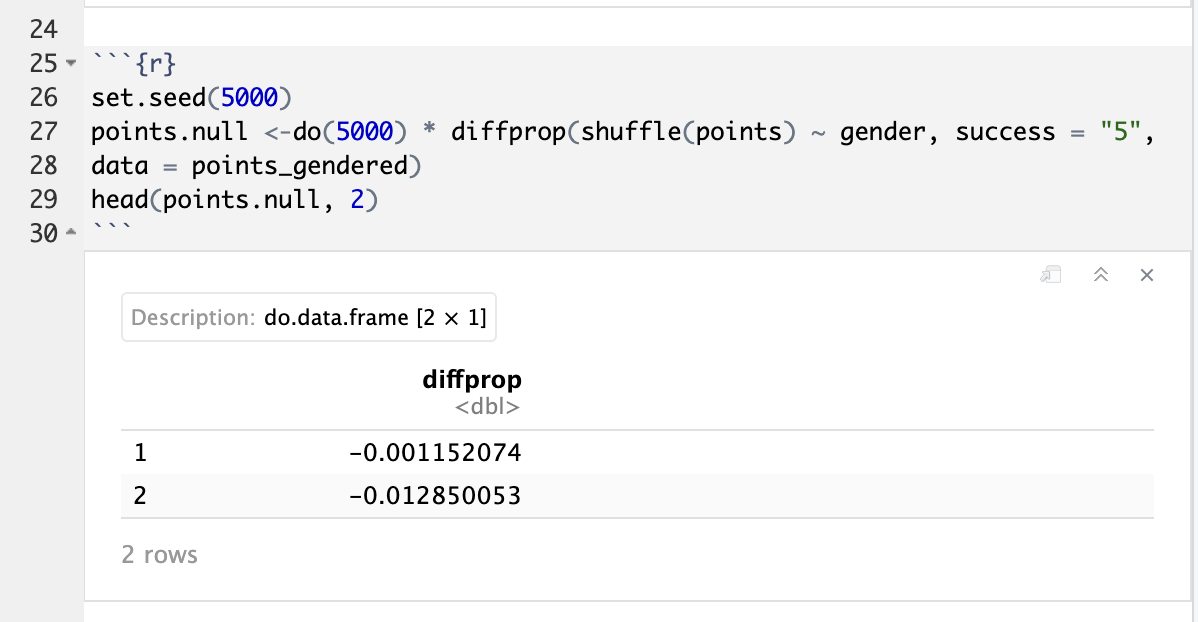

In [ ]:
Then I created a dotplot to show my distribution.

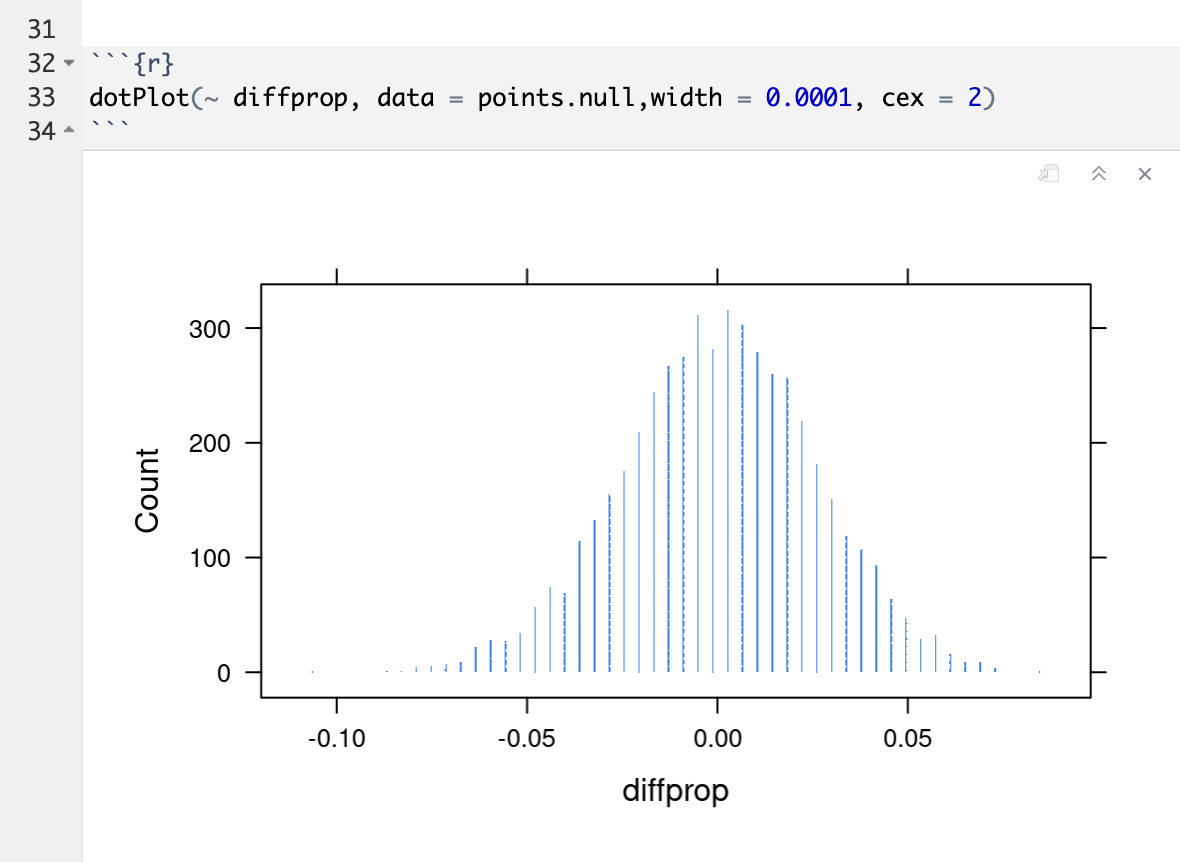


Then I looked to see how many standard deviations away from the mean my observed statistic appeared in the distribution.

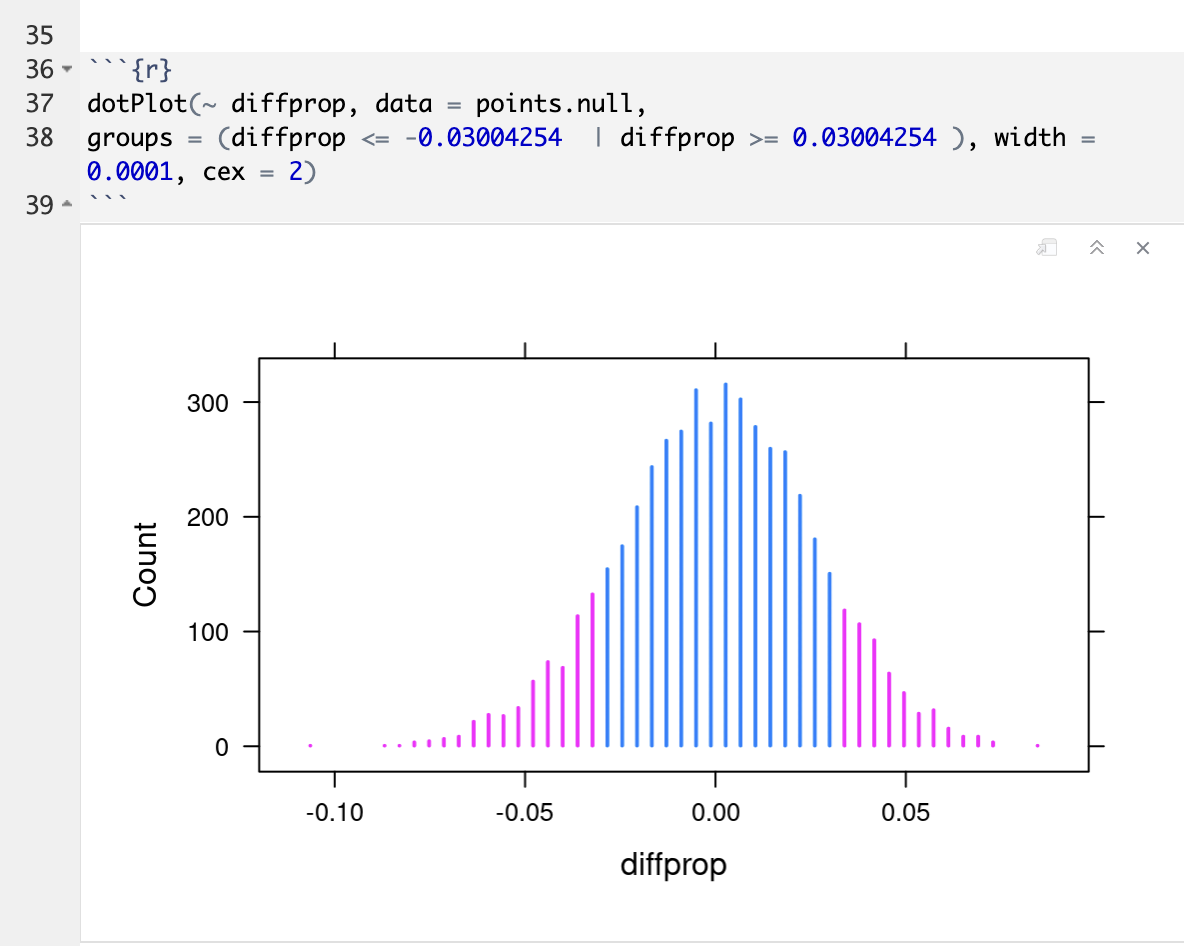

Then, I calculated the p-value.

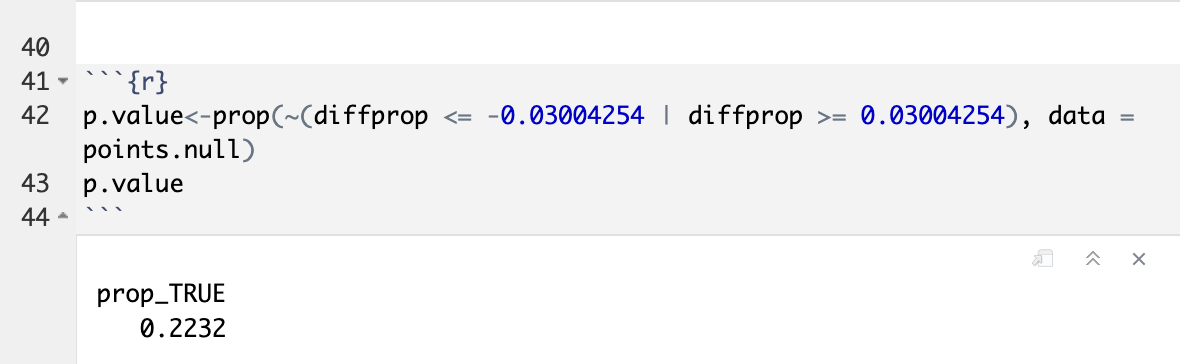

A p-value of 0.2232 is weak evidence against the null hypothesis that the proportion of 5 point scores awarded is the same between men and women. This means that, on average, the proportion of 5 point scores awarded to men versus women on Taskmaster is the same, and any minute differences that occur in individual trials are likely due to chance.

It looks like it's pretty safe to say that Greg is fair in awarding points regardless of gender!